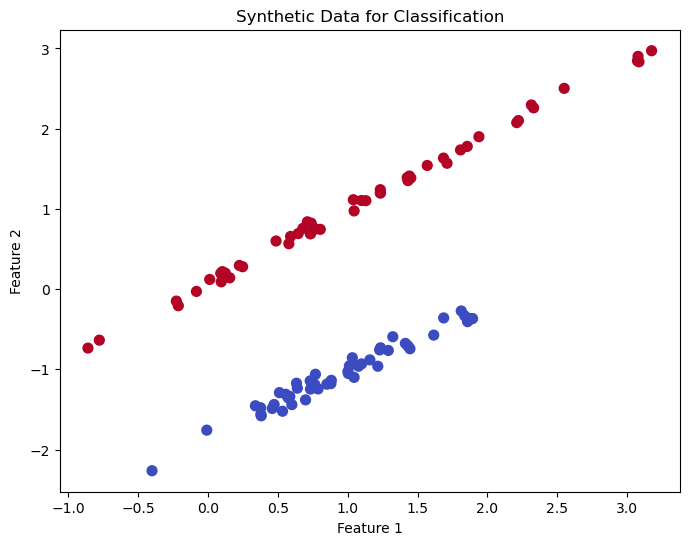

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data for classification
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for Classification')
plt.show()

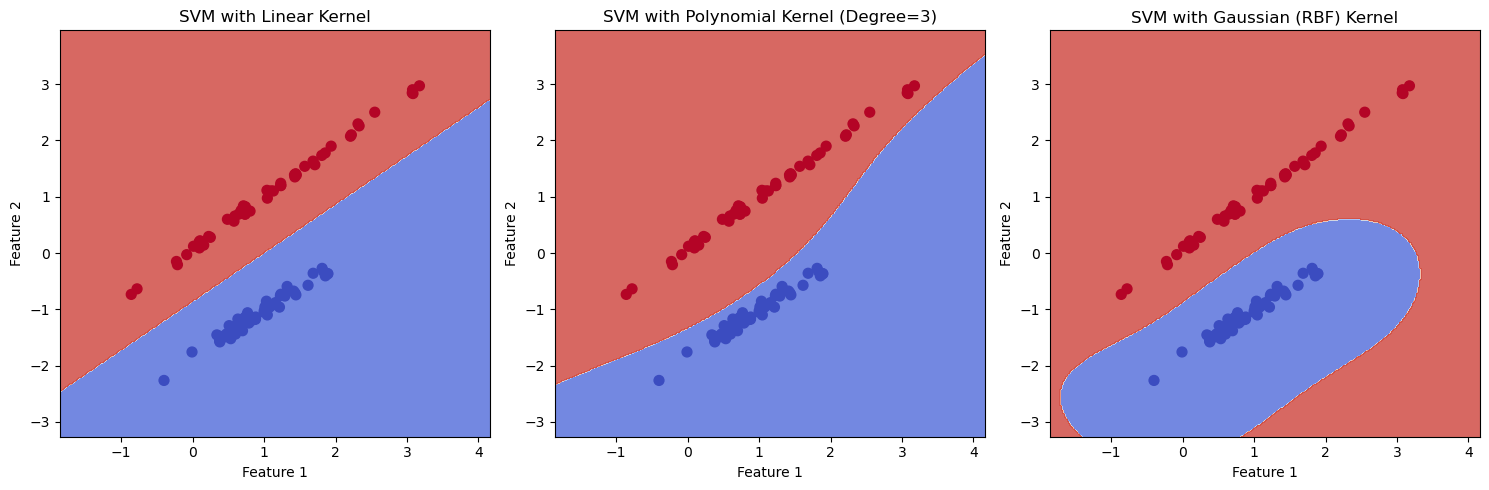

In [3]:
from sklearn.svm import SVC

# Define SVM models with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)  # Polynomial kernel of degree 3
svm_rbf = SVC(kernel='rbf', gamma=0.7)   # Gaussian (RBF) kernel with gamma=0.7

# Fit SVM models
svm_linear.fit(X, y)
svm_poly.fit(X, y)
svm_rbf.fit(X, y)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y):
    # Create a meshgrid for the entire feature space
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the labels for all points in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Plot decision boundaries for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(svm_linear, X, y)
plt.title('SVM with Linear Kernel')

plt.subplot(1, 3, 2)
plot_decision_boundary(svm_poly, X, y)
plt.title('SVM with Polynomial Kernel (Degree=3)')

plt.subplot(1, 3, 3)
plot_decision_boundary(svm_rbf, X, y)
plt.title('SVM with Gaussian (RBF) Kernel')

plt.tight_layout()
plt.show()


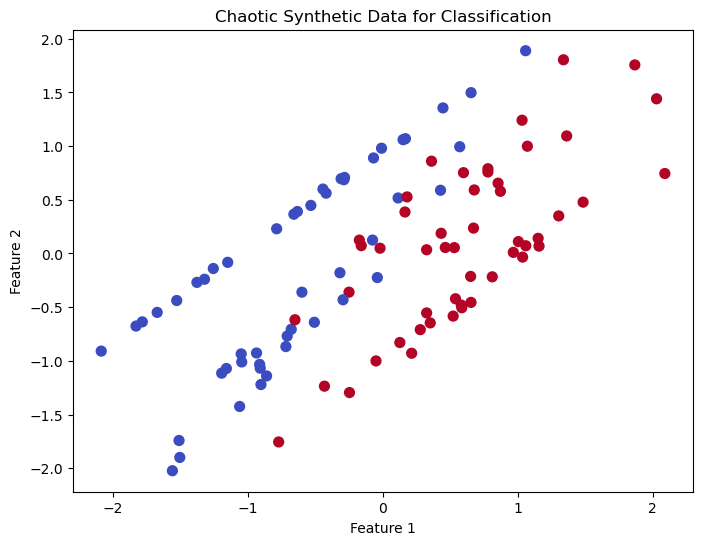

In [8]:
# Generate synthetic data for classification with more overlapping clusters
X_chaotic, y_chaotic = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                           n_clusters_per_class=2, n_classes=2, class_sep=0.5, random_state=42)

# Plot the chaotic data
plt.figure(figsize=(8, 6))
plt.scatter(X_chaotic[:, 0], X_chaotic[:, 1], c=y_chaotic, cmap=plt.cm.coolwarm, marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Chaotic Synthetic Data for Classification')
plt.show()

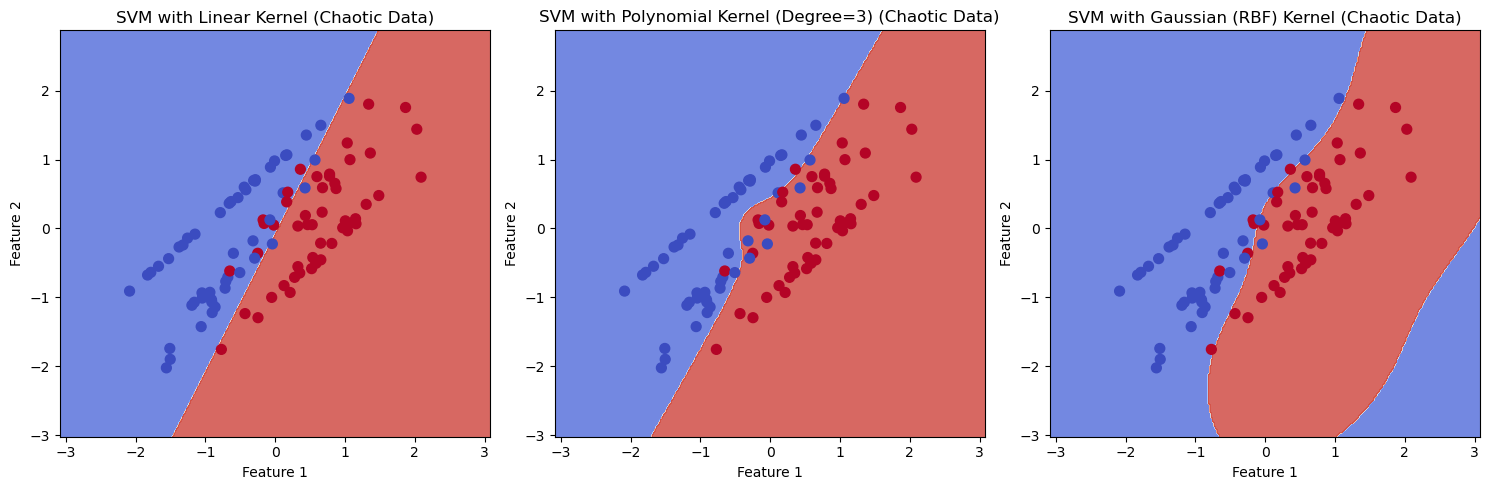

In [9]:
from sklearn.svm import SVC

# Define SVM models with different kernels
svm_linear_chaotic = SVC(kernel='linear')
svm_poly_chaotic = SVC(kernel='poly', degree=3)  # Polynomial kernel of degree 3
svm_rbf_chaotic = SVC(kernel='rbf', gamma=0.7)   # Gaussian (RBF) kernel with gamma=0.7

# Fit SVM models
svm_linear_chaotic.fit(X_chaotic, y_chaotic)
svm_poly_chaotic.fit(X_chaotic, y_chaotic)
svm_rbf_chaotic.fit(X_chaotic, y_chaotic)

# Function to plot decision boundaries
def plot_decision_boundary_chaotic(model, X, y):
    # Create a meshgrid for the entire feature space
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the labels for all points in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Plot decision boundaries for each model with chaotic data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary_chaotic(svm_linear_chaotic, X_chaotic, y_chaotic)
plt.title('SVM with Linear Kernel (Chaotic Data)')

plt.subplot(1, 3, 2)
plot_decision_boundary_chaotic(svm_poly_chaotic, X_chaotic, y_chaotic)
plt.title('SVM with Polynomial Kernel (Degree=3) (Chaotic Data)')

plt.subplot(1, 3, 3)
plot_decision_boundary_chaotic(svm_rbf_chaotic, X_chaotic, y_chaotic)
plt.title('SVM with Gaussian (RBF) Kernel (Chaotic Data)')

plt.tight_layout()
plt.show()

Evaluation Metrics for SVM with Linear Kernel:
Accuracy: 0.88
Precision: 0.9130434782608695
Recall: 0.84
F1 Score: 0.875


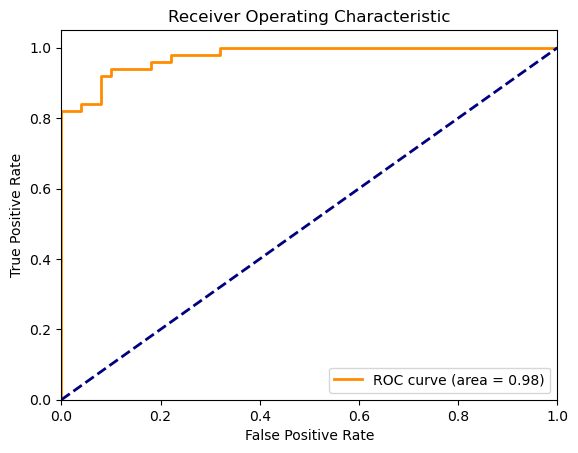


Evaluation Metrics for SVM with Polynomial Kernel (Degree=3):
Accuracy: 0.91
Precision: 0.8727272727272727
Recall: 0.96
F1 Score: 0.9142857142857143


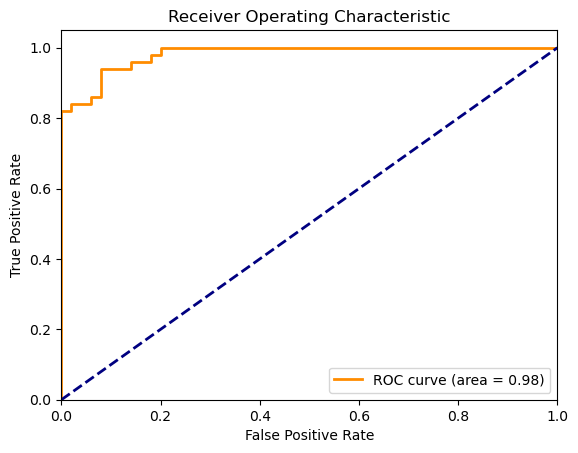


Evaluation Metrics for SVM with Gaussian (RBF) Kernel:
Accuracy: 0.9
Precision: 0.9166666666666666
Recall: 0.88
F1 Score: 0.8979591836734694


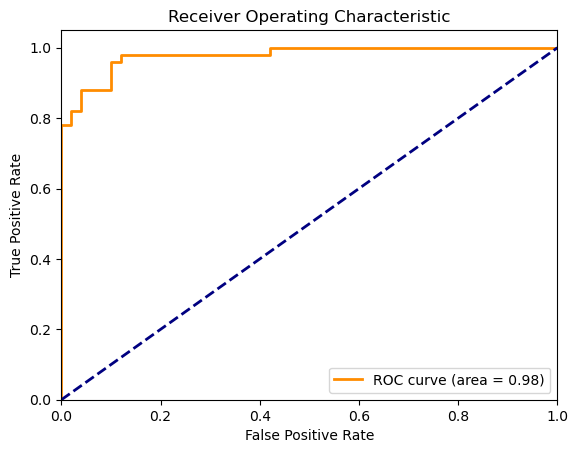

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y):
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Plot ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate each SVM model
print("Evaluation Metrics for SVM with Linear Kernel:")
evaluate_model(svm_linear_chaotic, X_chaotic, y_chaotic)

print("\nEvaluation Metrics for SVM with Polynomial Kernel (Degree=3):")
evaluate_model(svm_poly_chaotic, X_chaotic, y_chaotic)

print("\nEvaluation Metrics for SVM with Gaussian (RBF) Kernel:")
evaluate_model(svm_rbf_chaotic, X_chaotic, y_chaotic)

In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

# Split data into training and validation sets
X_train_chaotic, X_val_chaotic, y_train_chaotic, y_val_chaotic = train_test_split(X_chaotic, y_chaotic, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search with cross-validation
grid_search_chaotic = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search_chaotic.fit(X_train_chaotic, y_train_chaotic)

# Get the best parameters and best accuracy
best_params_chaotic = grid_search_chaotic.best_params_
best_accuracy_chaotic = grid_search_chaotic.best_score_

print("Best Parameters:", best_params_chaotic)
print("Best Accuracy:", best_accuracy_chaotic)

# Evaluate the best model on the validation set
best_model_chaotic = grid_search_chaotic.best_estimator_
accuracy_on_validation_set_chaotic = best_model_chaotic.score(X_val_chaotic, y_val_chaotic)
print("Accuracy on Validation Set:", accuracy_on_validation_set_chaotic)



Best Parameters: {'C': 10, 'gamma': 1}
Best Accuracy: 0.9
Accuracy on Validation Set: 0.9
